## Yolov5 

Use the verions `886f1c03d839575afecb059accf74296fad395b6` 

Therefore, you need to checkout to this commit ID

## Folder Structure


```bash 
.
├── LPD_LAO_ChienKhuong_21-03-2023_v1.0
│   ├── test
│   │   ├── images
│   │   └── labels
│   ├── train
│   │   ├── images
│   │   └── labels
│   └── val
│       ├── images
│       └── labels
├── __pycache__
├── data
│   ├── images
│   └── scripts
├── models
│   ├── __pycache__
│   └── hub
├── runs
│   ├── detect
│   │   ├── exp
│   │   └── exp2
│   └── train
│       ├── CN_VN_Lao_yolov5
│       │   └── weights
│       └── CN_VN_Lao_yolov52
│           └── weights
├── utils
│   ├── __pycache__
│   ├── aws
│   ├── google_app_engine
│   └── wandb_logging
├── wandb
│   ├── latest-run -> run-20230328_204436-2fwmbm2b
│   └── run-20230328_204436-2fwmbm2b
│       ├── files
│       │   └── media
│       │       ├── images
│       │       └── metadata
│       │           └── boxes2D
│       ├── logs
│       └── tmp
│           └── code
└── weights

```

!git checkout 886f1c03d839575afecb059accf74296fad395b6

In [1]:
%set_env TRAIN_NAME="LPD_Lao_ChienKhuong_22-03-2023"

env: TRAIN_NAME="LPD_Lao_ChienKhuong_22-03-2023"


In [2]:
!nvidia-smi

Tue Mar 28 20:44:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:05:00.0 Off |                  N/A |
|  0%   18C    P8    11W / 170W |    151MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/root/yolov8


In [4]:
%cd $HOME

/root/yolov8


In [5]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat yolov5/data.yaml

names:
- lao
- vn_1_line
- vn_2_line
nc: 3
roboflow:
  license: Private
  project: license-plate-fti9n
  url: https://app.roboflow.com/hungle/license-plate-fti9n/1
  version: 1
  workspace: hungle
test: LPD_LAO_ChienKhuong_21-03-2023_v1.0/test/images
train: LPD_LAO_ChienKhuong_21-03-2023_v1.0/train/images
val: LPD_LAO_ChienKhuong_21-03-2023_v1.0/val/images


In [6]:
# define number of classes based on YAML
import yaml
with open("yolov5/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [7]:
num_classes

'3'

In [8]:
%cat {HOME}/yolov5/models/yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [9]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [10]:
%%writetemplate {HOME}/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [11]:
%cat {HOME}/yolov5/models/custom_yolov5s.yaml


# parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-

# Train Custom YOLOv5 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://www.wandb.com/) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<img src="https://user-images.githubusercontent.com/26833433/98184457-bd3da580-1f0a-11eb-8461-95d908a71893.jpg" width="800">

In [12]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [13]:
%cd {HOME}/yolov5/

/root/yolov8/yolov5


In [14]:
%set_env TRAIN_NAME=VN_Lao_yolov5_28032023
%set_env EPOCH=100
%set_env MODEL_INPUT_SIZE=640

env: TRAIN_NAME=CN_VN_Lao_yolov5
env: EPOCH=5
env: MODEL_INPUT_SIZE=640


!pip install comet_ml

In [15]:
!python train.py --img $MODEL_INPUT_SIZE --batch 16 --epochs $EPOCH --data './data.yaml' --cfg models/custom_yolov5s.yaml --weights '' --name $TRAIN_NAME  --cache --log-artifacts --device 0

github: skipping check (Docker image)
YOLOv5 v4.0-126-g886f1c0 torch 1.10.2+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12050.0MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='models/custom_yolov5s.yaml', data='./data.yaml', device='0', entity=None, epochs=5, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], linear_lr=False, local_rank=-1, log_artifacts=True, log_imgs=16, multi_scale=False, name='CN_VN_Lao_yolov5', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/CN_VN_Lao_yolov52', single_cls=False, sync_bn=False, total_batch_size=16, weights='', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0

In [16]:
# train yolov5s on custom data for 100 epochs
# !python train.py --img 640 --batch 8 --epochs 100 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name $TRAIN_NAME  --cache --artifact_alias=latest
# !python train.py --img 640 --batch 16 --epochs 100 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name $TRAIN_NAME  --cache --log-artifacts

# Evaluate Custom YOLOv5 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

In [17]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard 
%tensorboard --logdir runs

In [18]:
%cd {HOME}/yolov5

/root/yolov8/yolov5


In [19]:
from IPython.display import display, Image

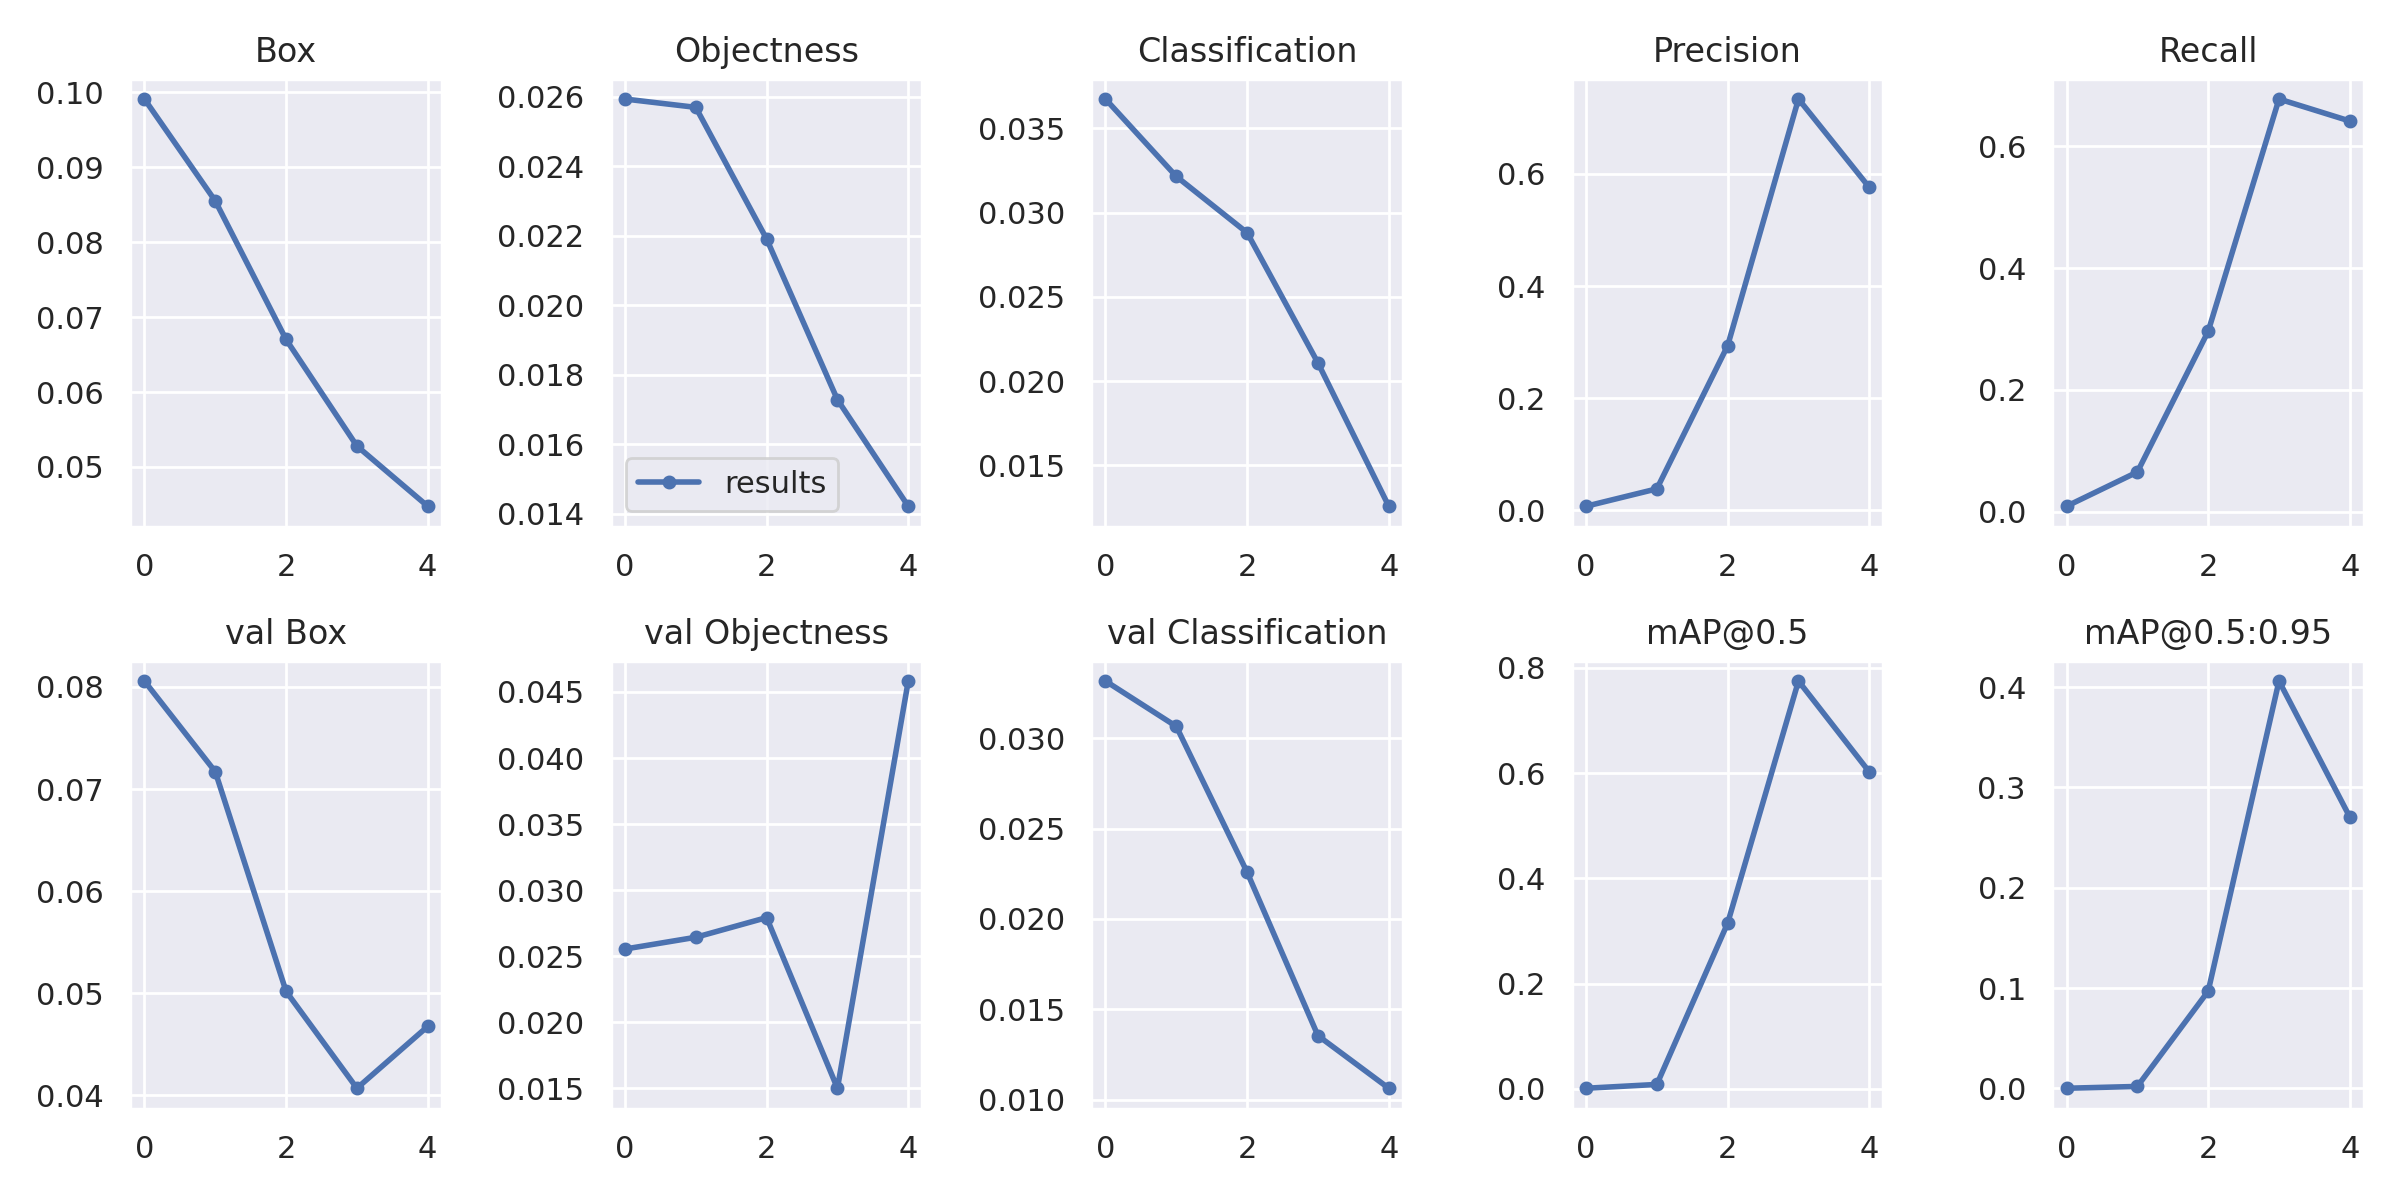

In [21]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='runs/train/CN_VN_Lao_yolov52/results.png', width=1000)  # view results.png

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

/root/yolov8/yolov5
GROUND TRUTH TRAINING DATA:


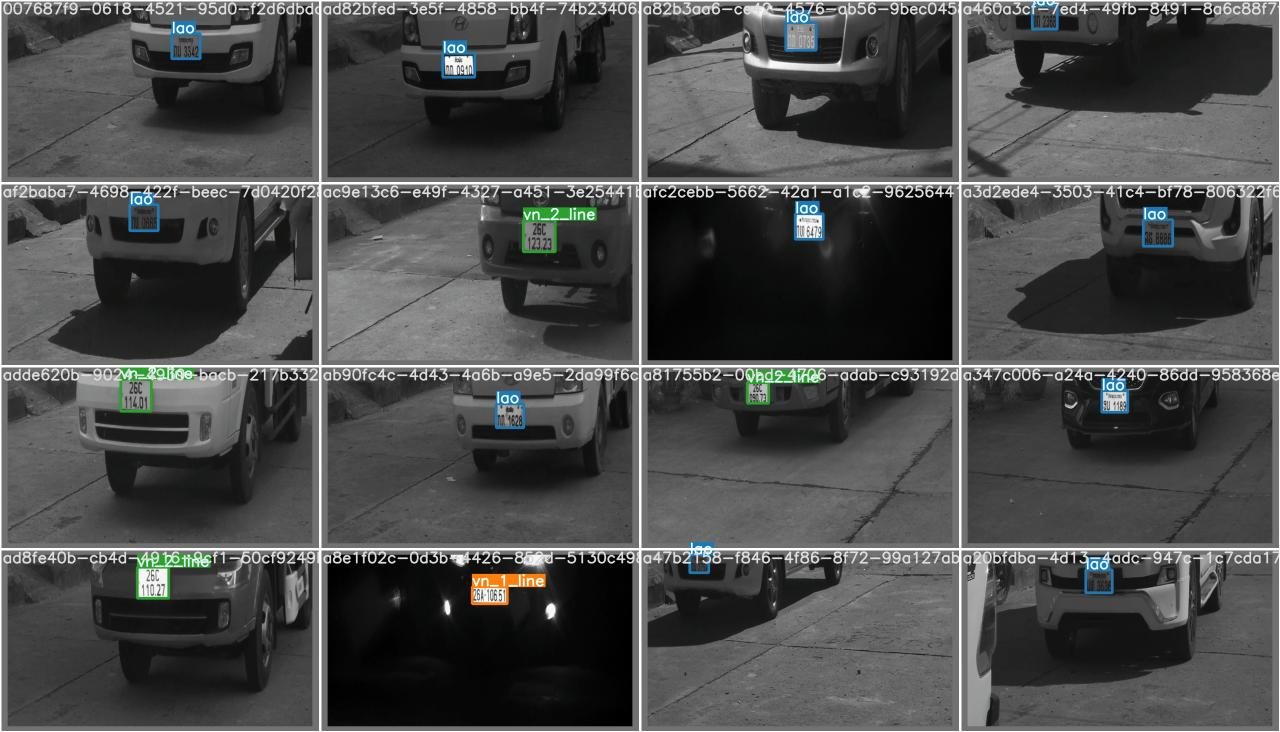

In [22]:
# first, display our ground truth data
%cd {HOME}/yolov5
print("GROUND TRUTH TRAINING DATA:")
Image(filename='runs/train/CN_VN_Lao_yolov52/test_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


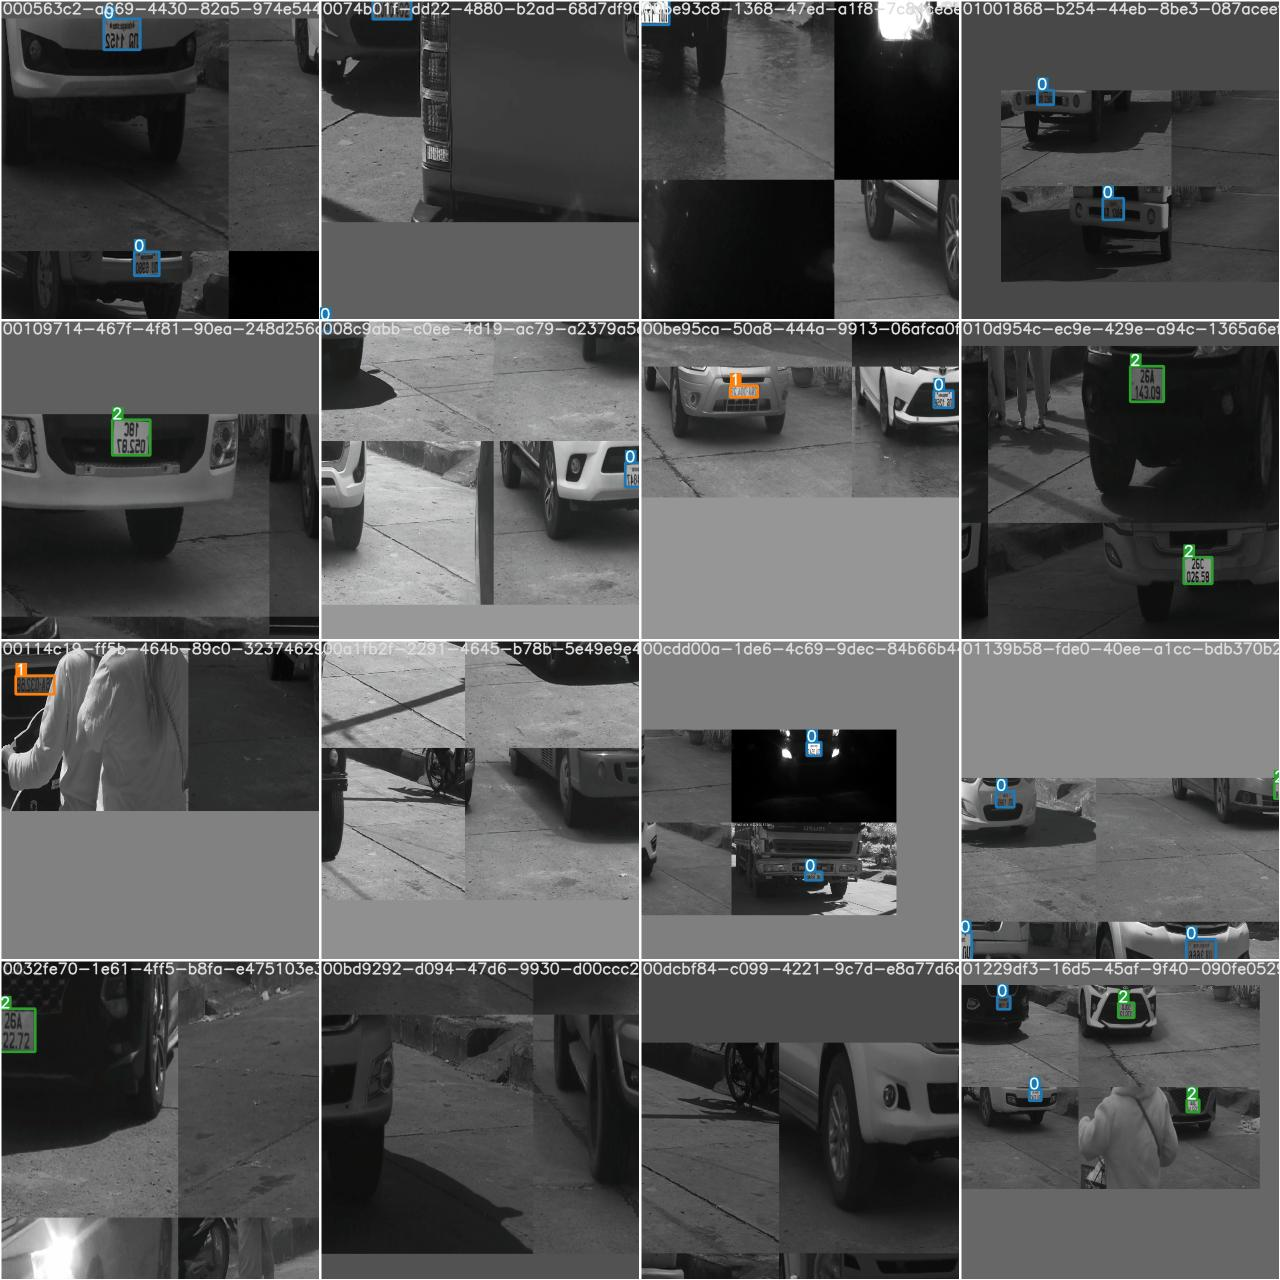

In [23]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='runs/train/CN_VN_Lao_yolov52/train_batch0.jpg', width=900)

# Run Inference  With Trained Weights

Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [24]:
%ls runs/train/CN_VN_Lao_yolov52/weights

best.pt  last.pt


In [26]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd {HOME}/yolov5/
!python detect.py --weights runs/train/CN_VN_Lao_yolov52/weights/best.pt --img 640 --conf 0.4 --source LPD_LAO_ChienKhuong_21-03-2023_v1.0/test/images


/root/yolov8/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='LPD_LAO_ChienKhuong_21-03-2023_v1.0/test/images', update=False, view_img=False, weights=['runs/train/CN_VN_Lao_yolov52/weights/best.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.10.2+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12050.0MB)

Fusing layers... 
/opt/conda/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 232 layers, 7251912 parameters, 0 gradients, 16.8 GFLOPS
image 1/355 /root/yolov8/yolov5/LPD_LAO_ChienKhuong_21-03-2023_v1.0/test/images/0007d2ab-526e-4712-821f-d35f3cee5f8c.jpg: 384x640 1 lao, Done. 

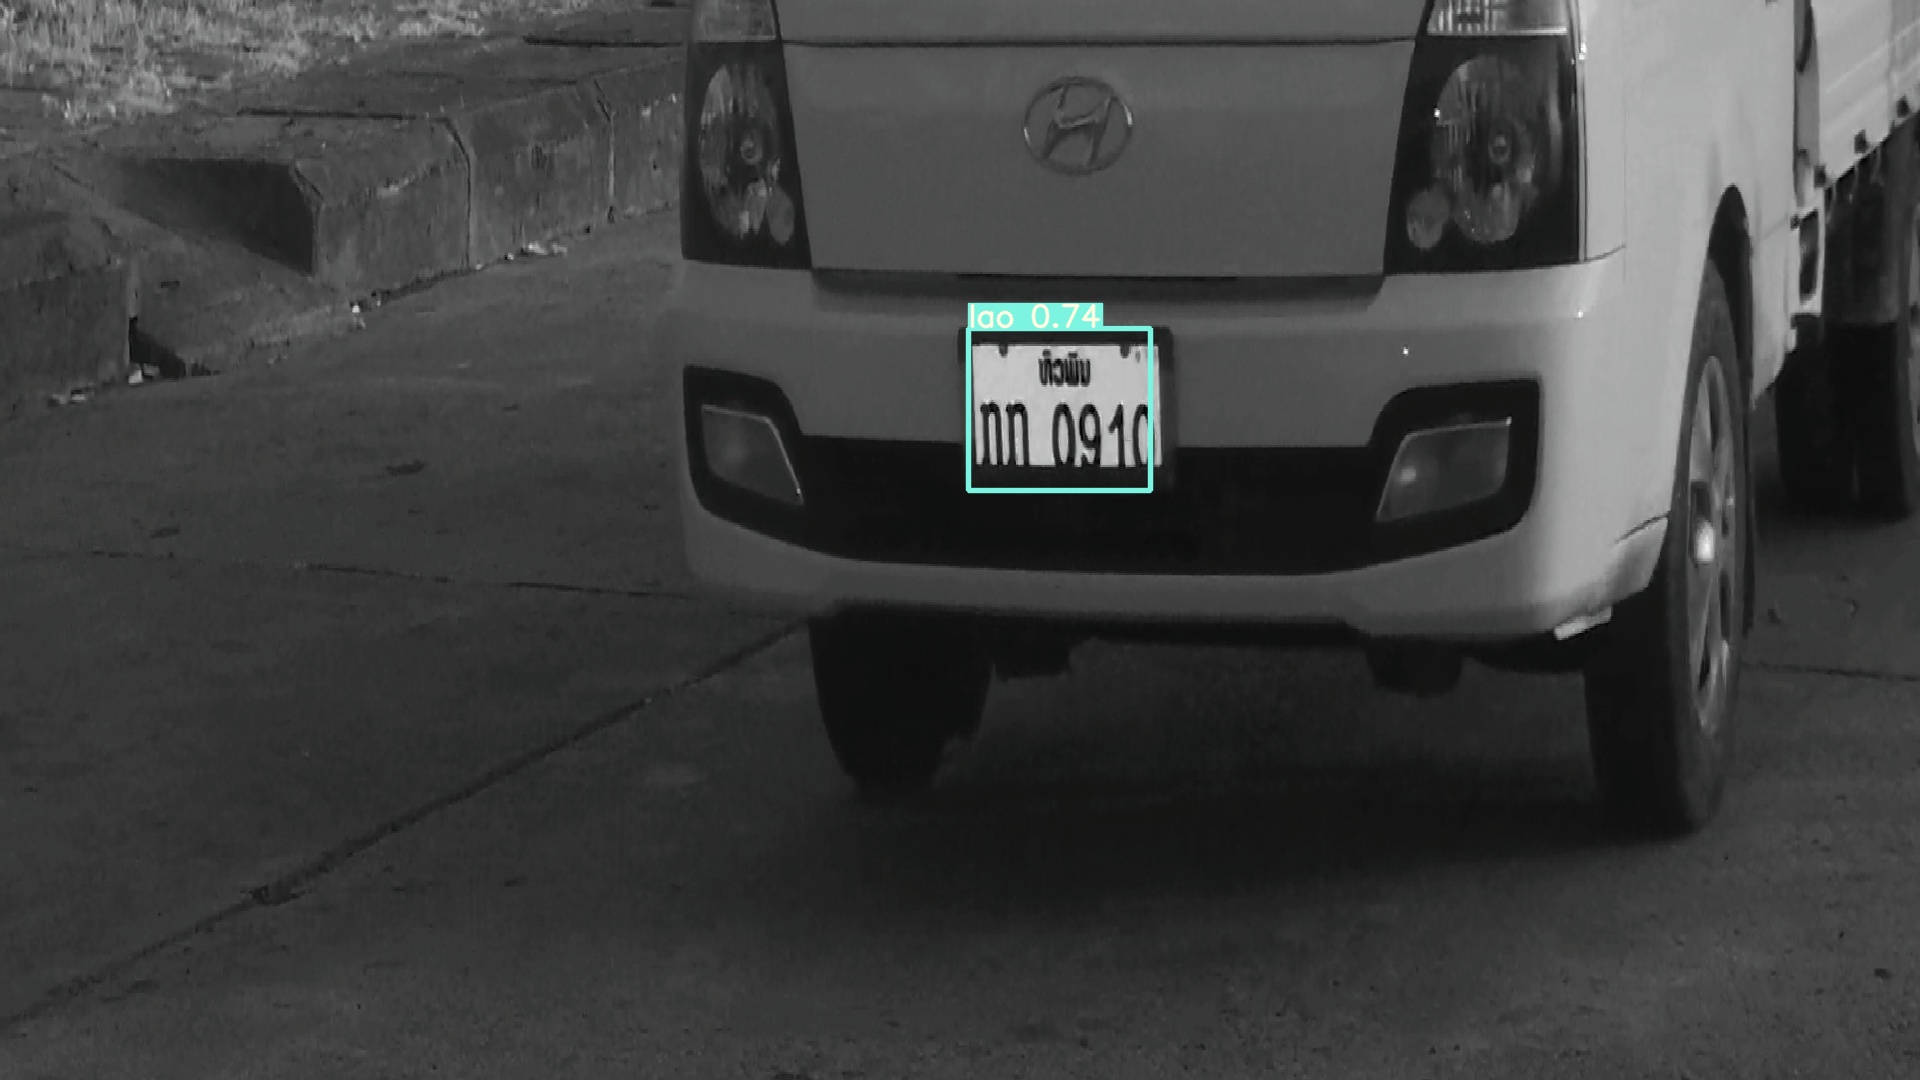

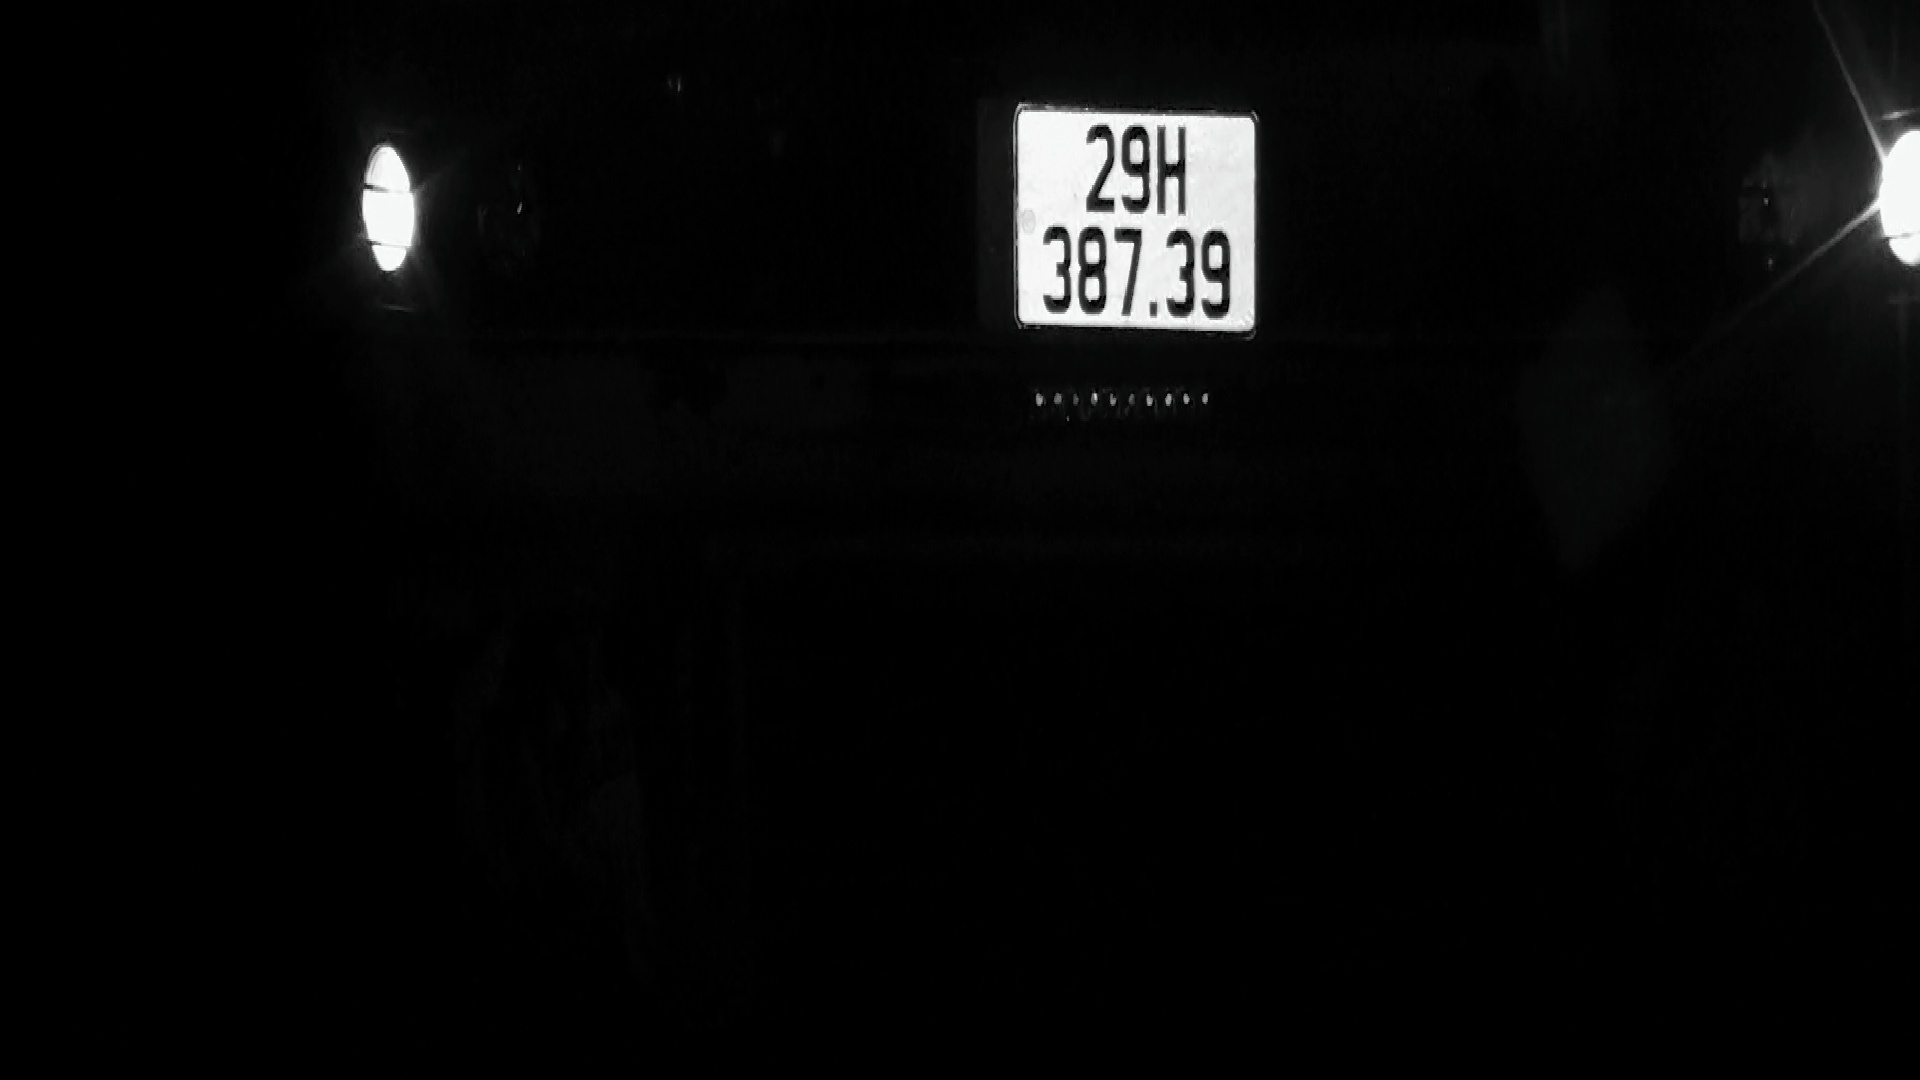

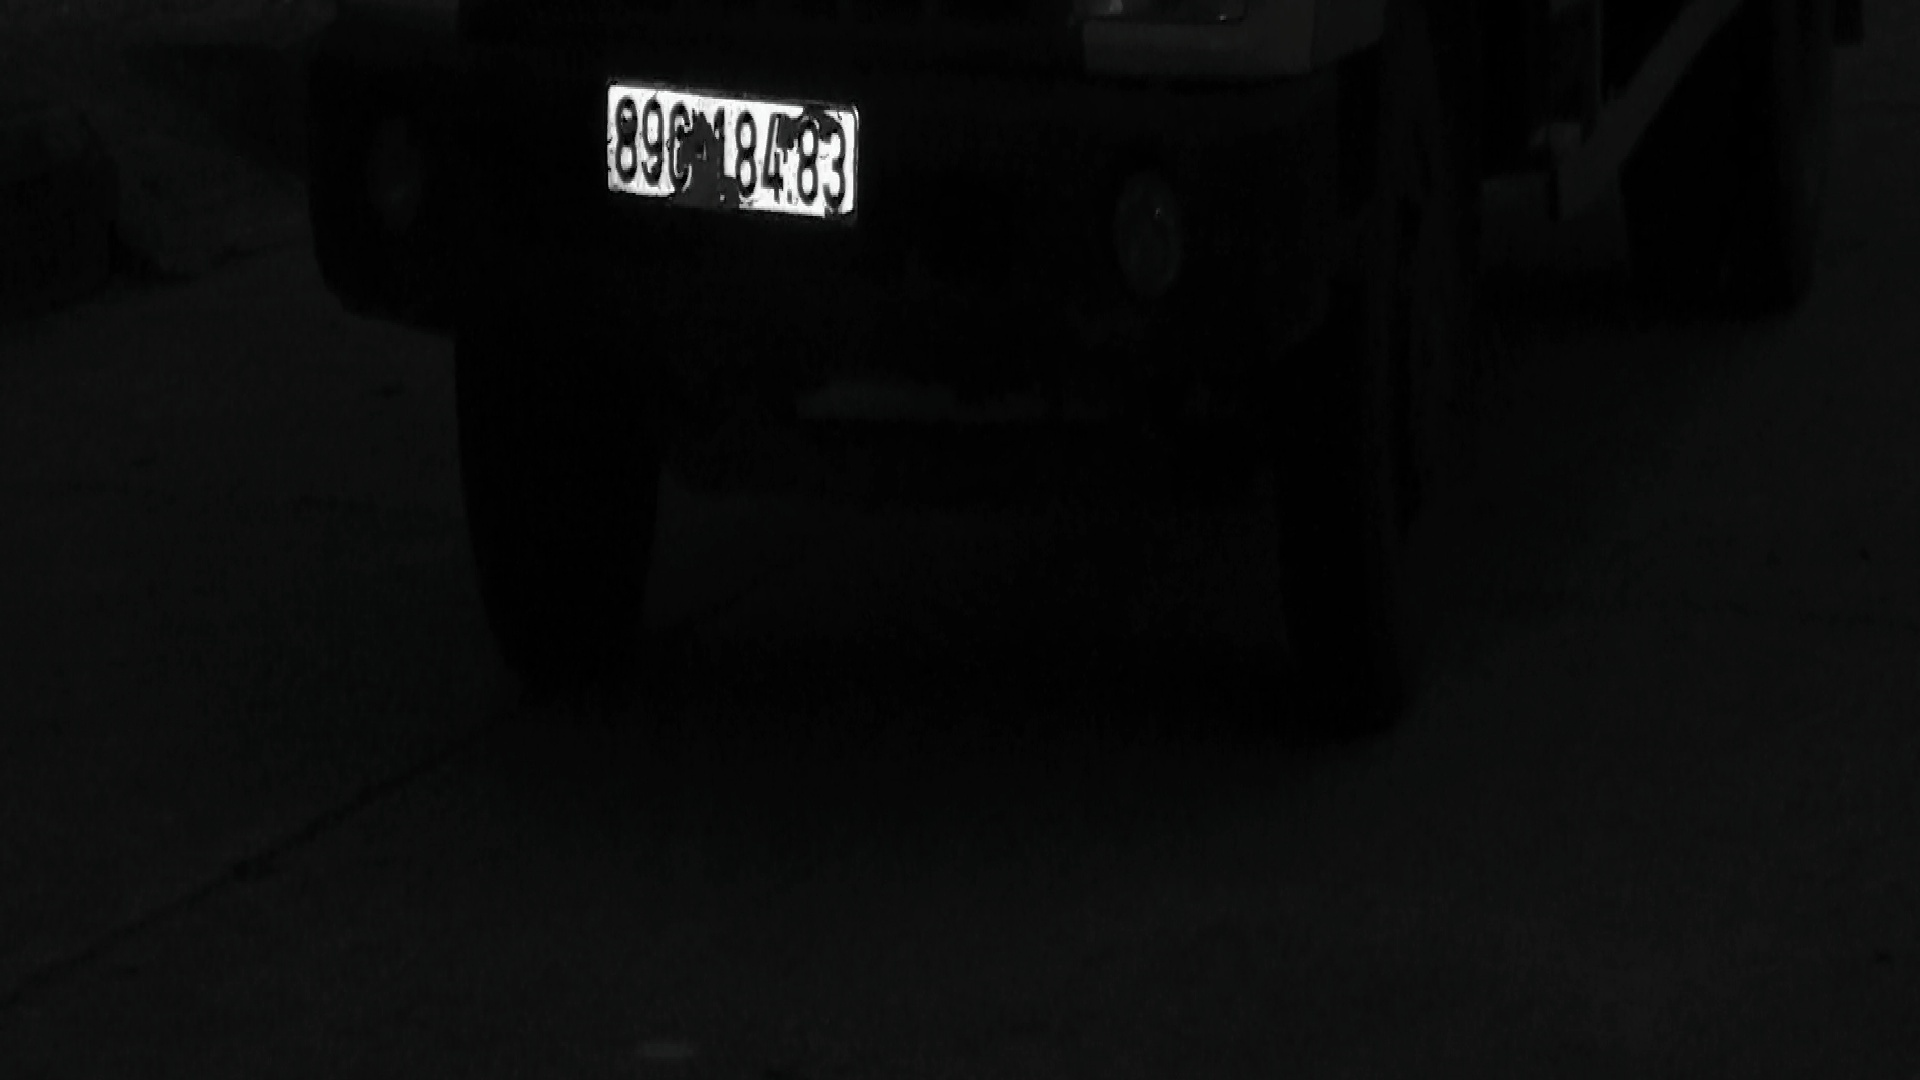

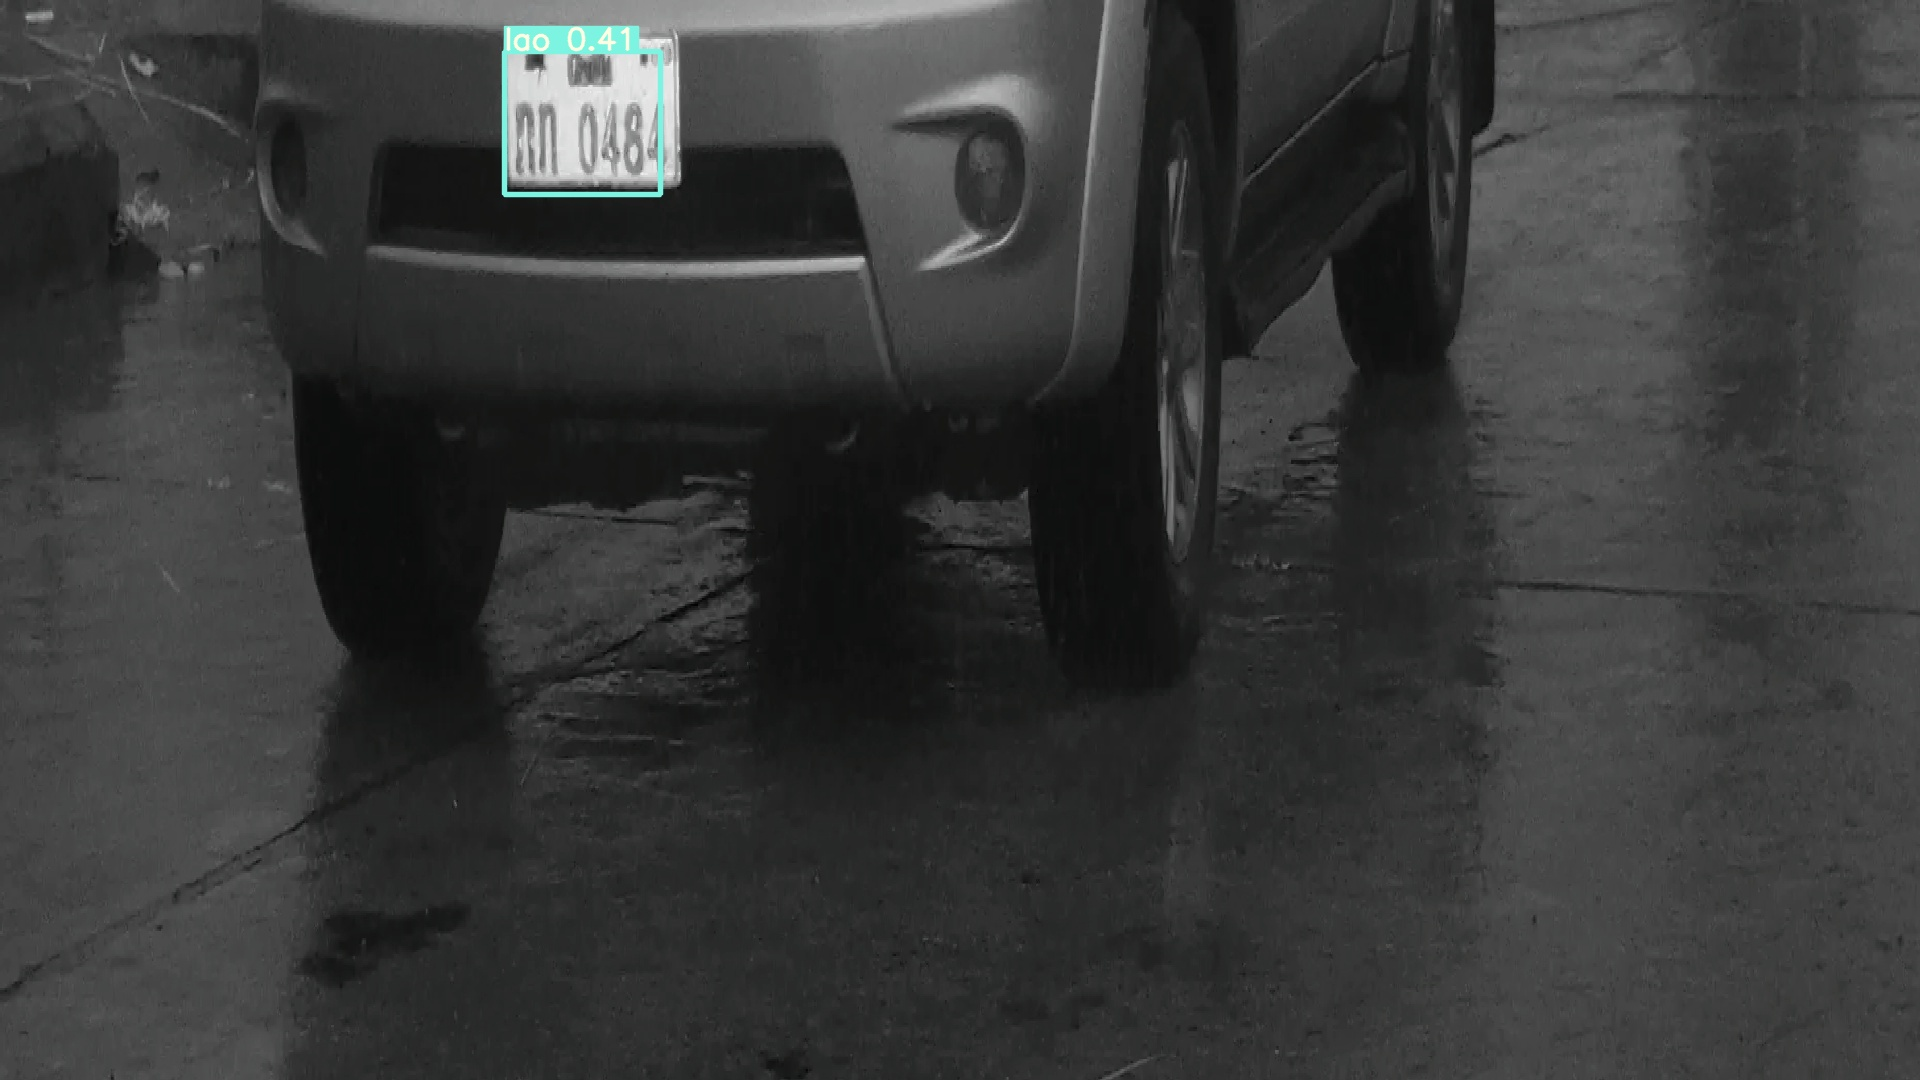

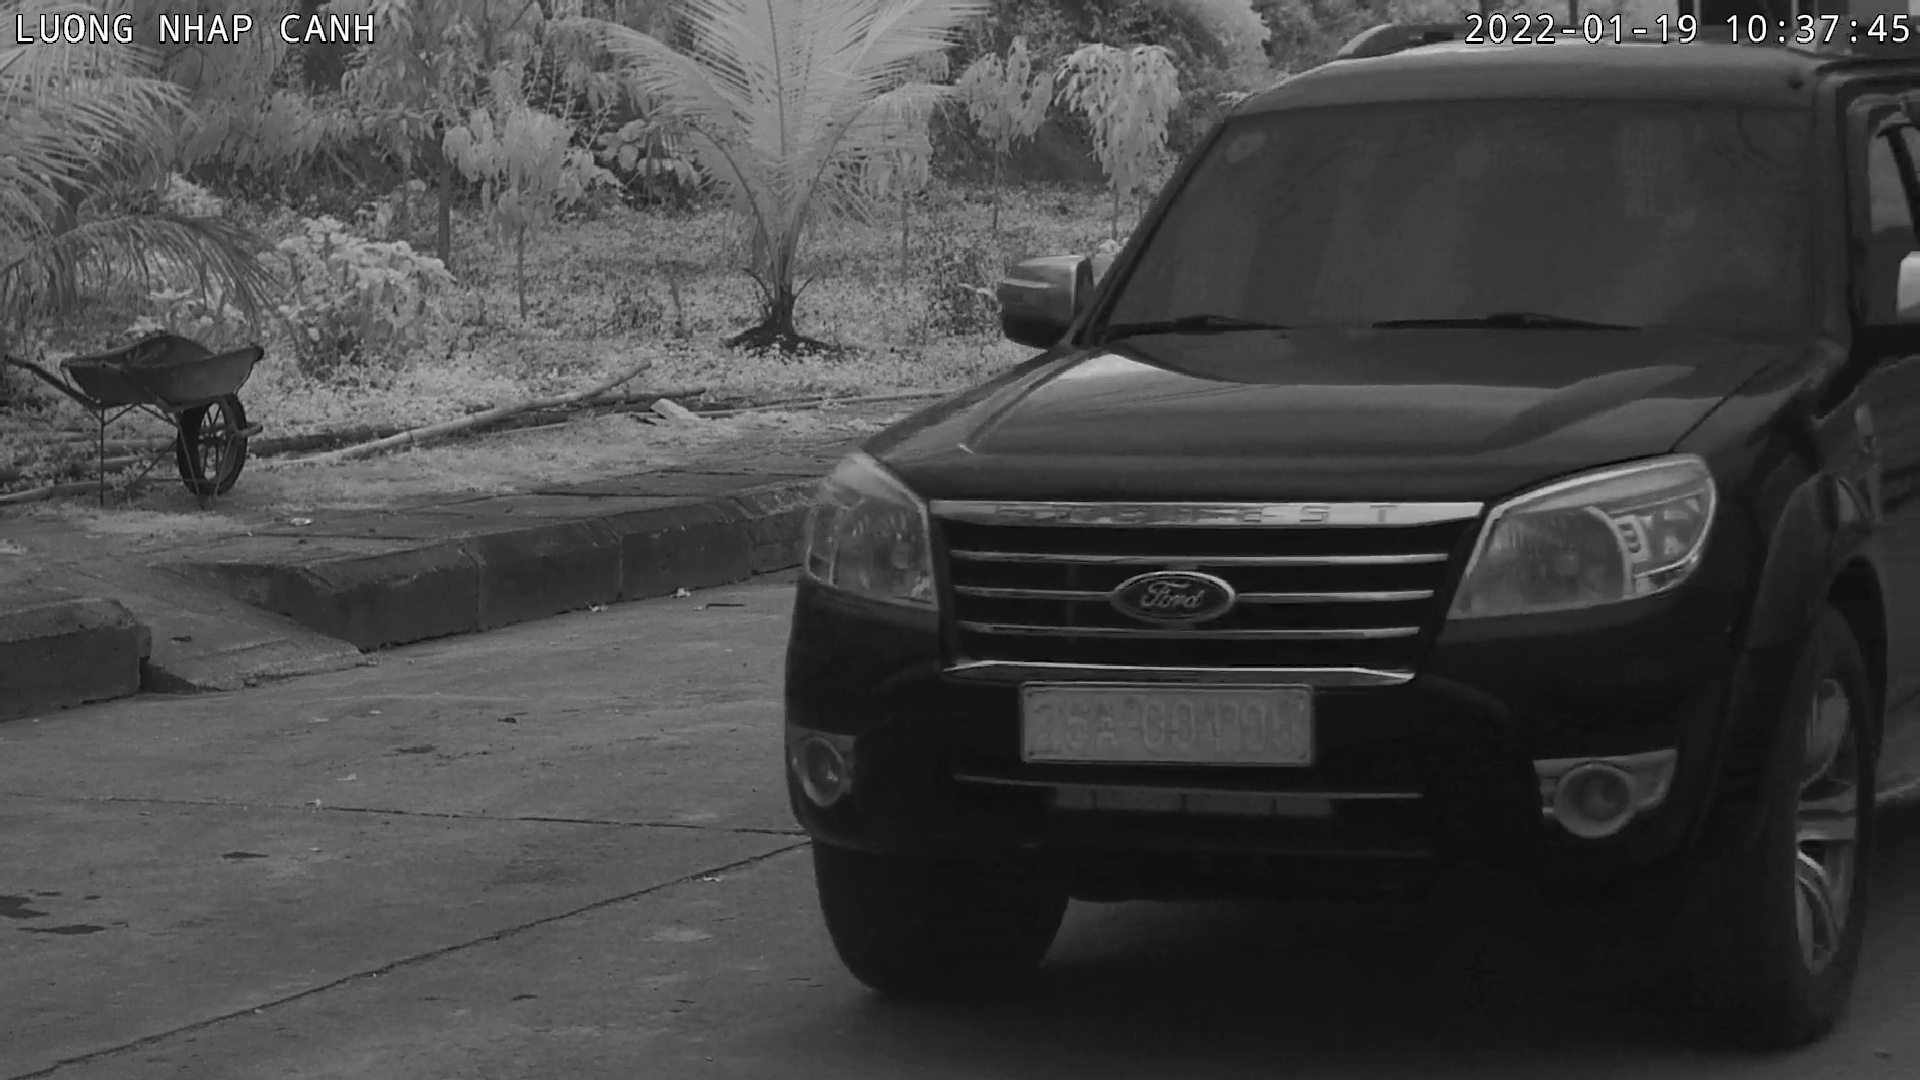

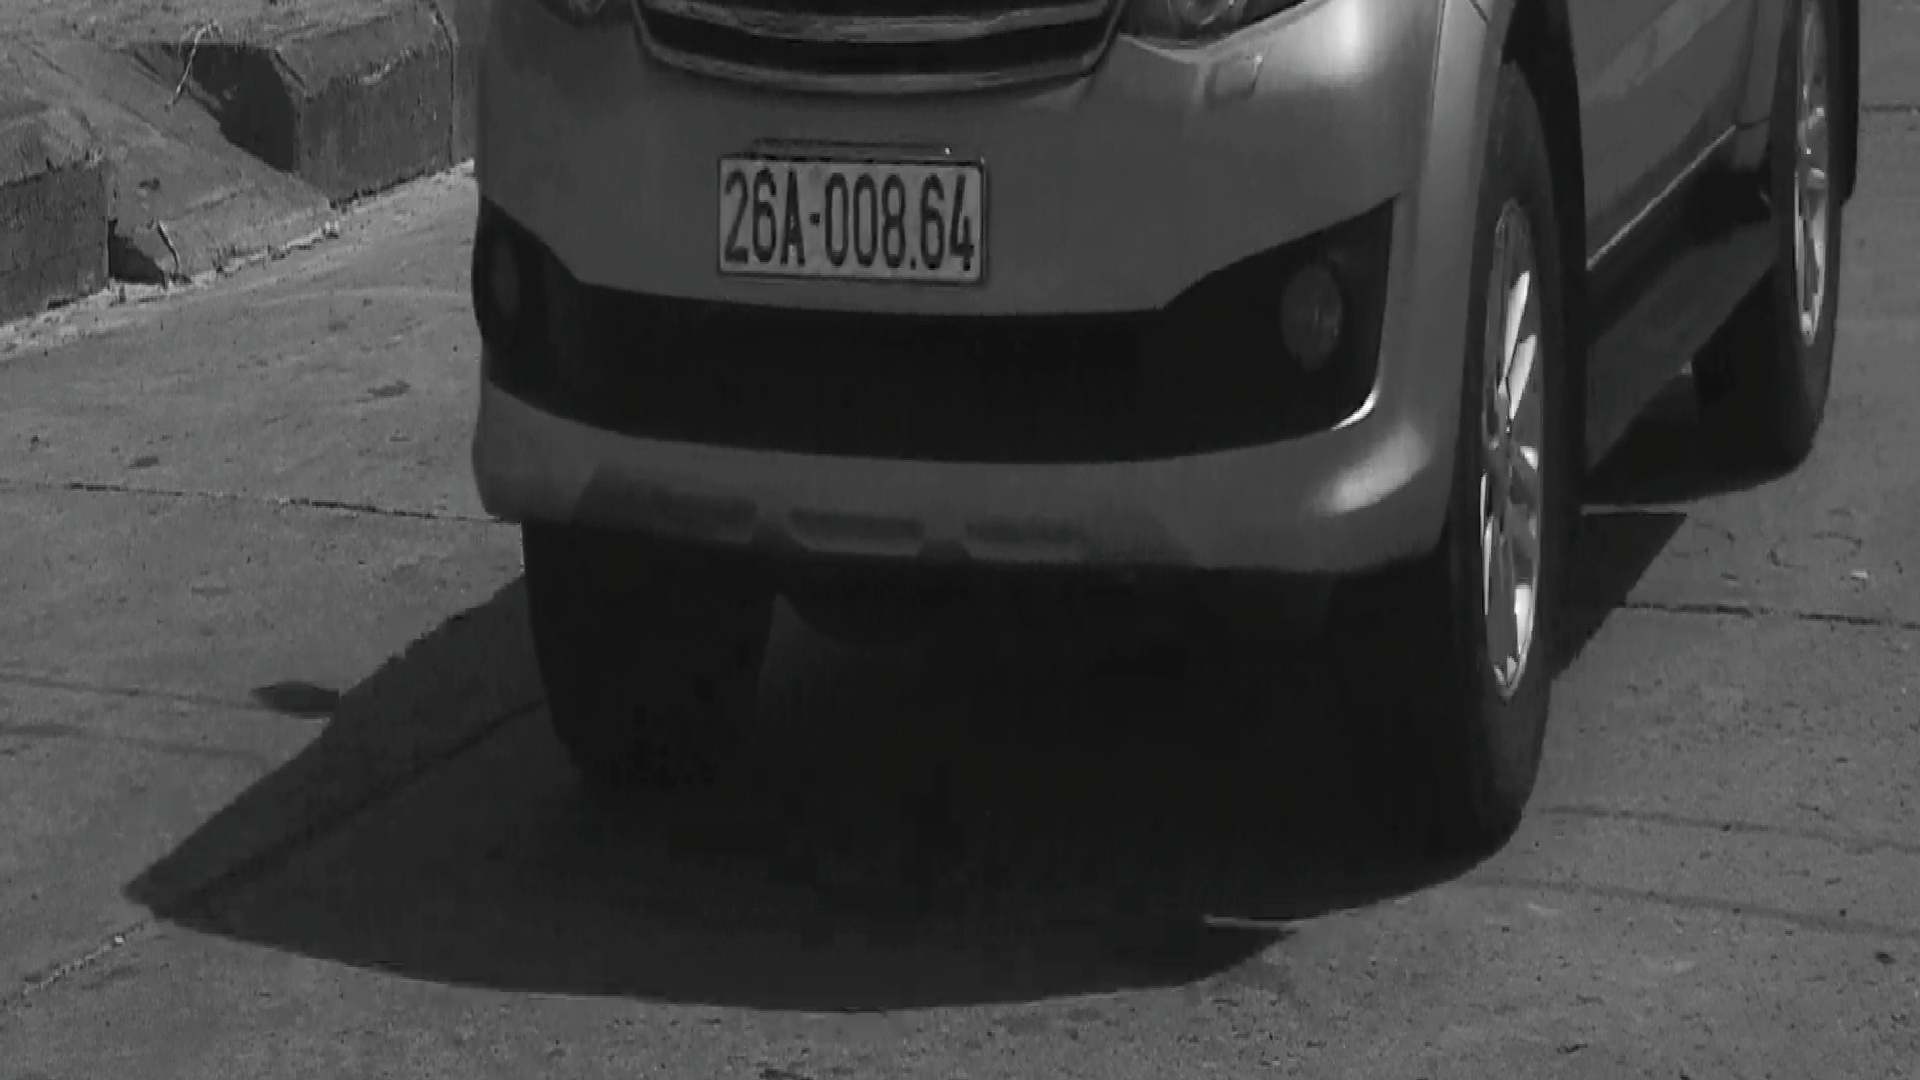

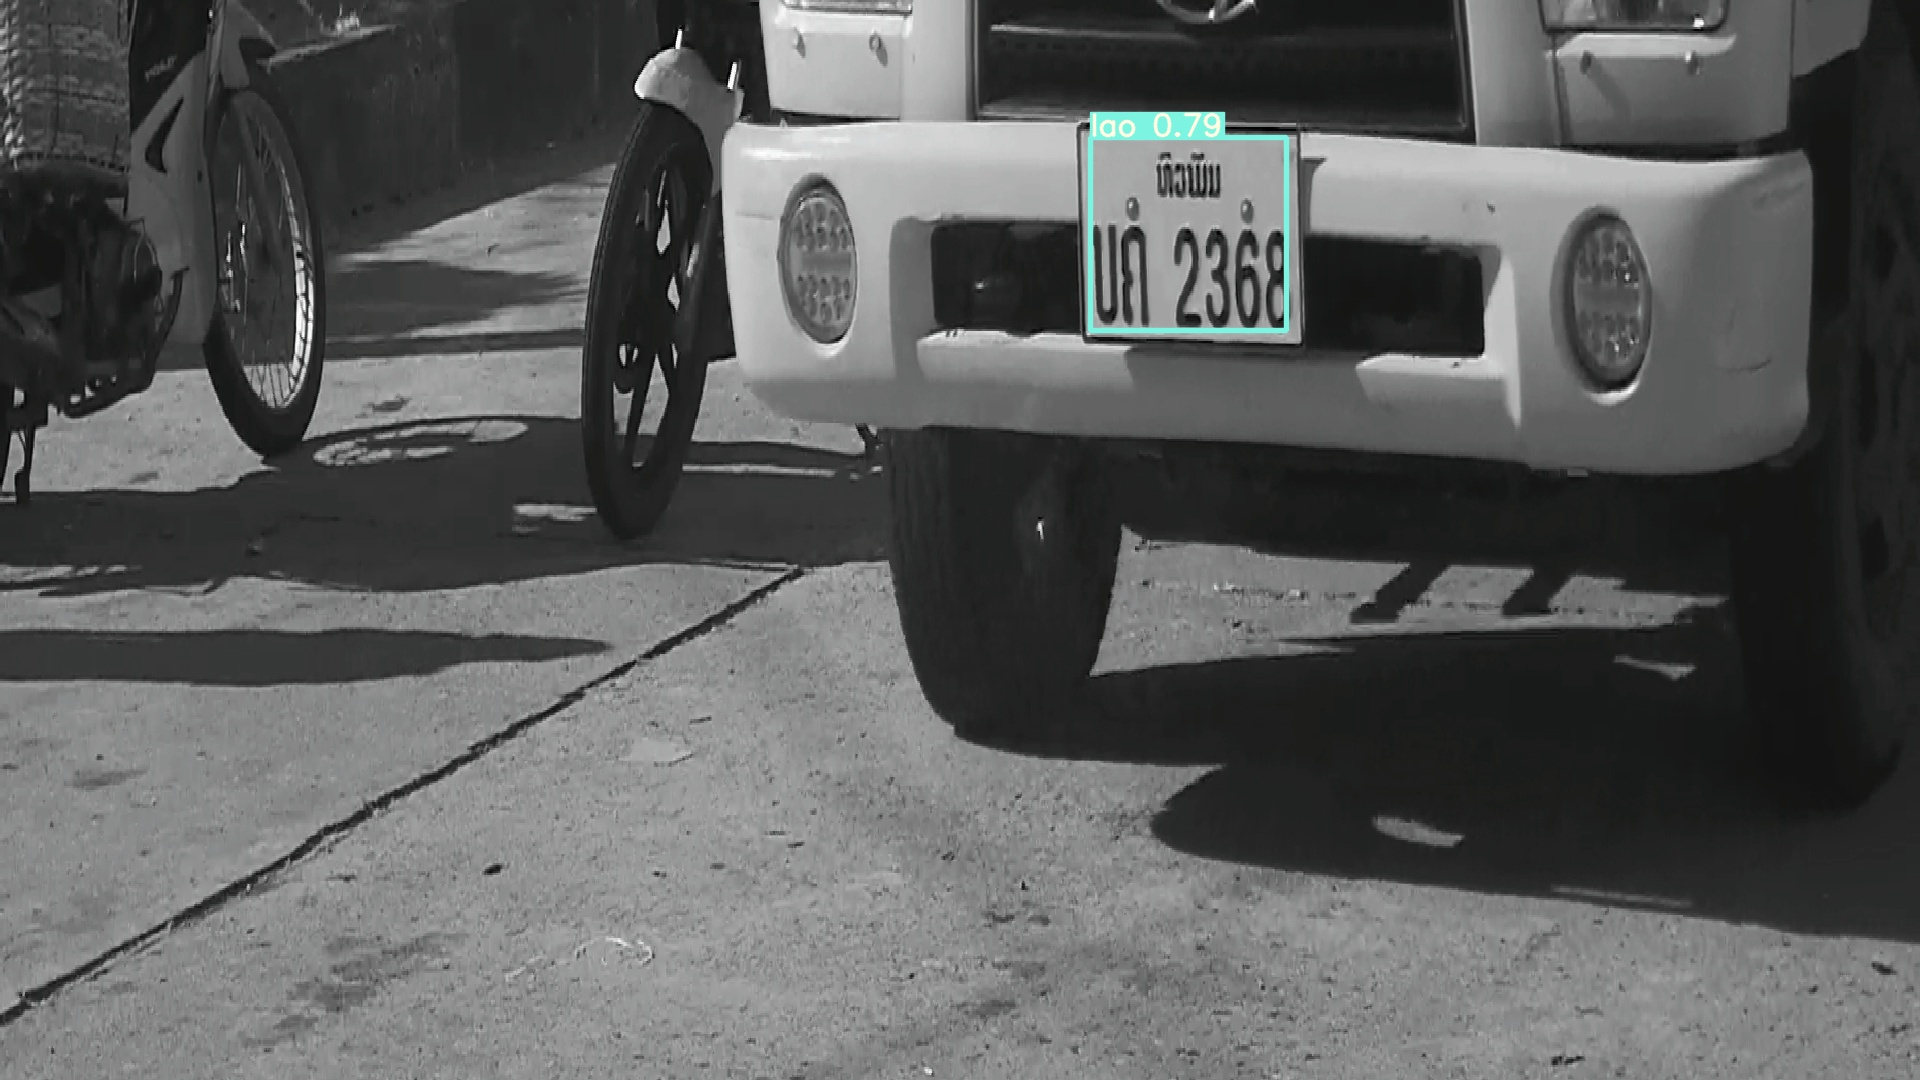

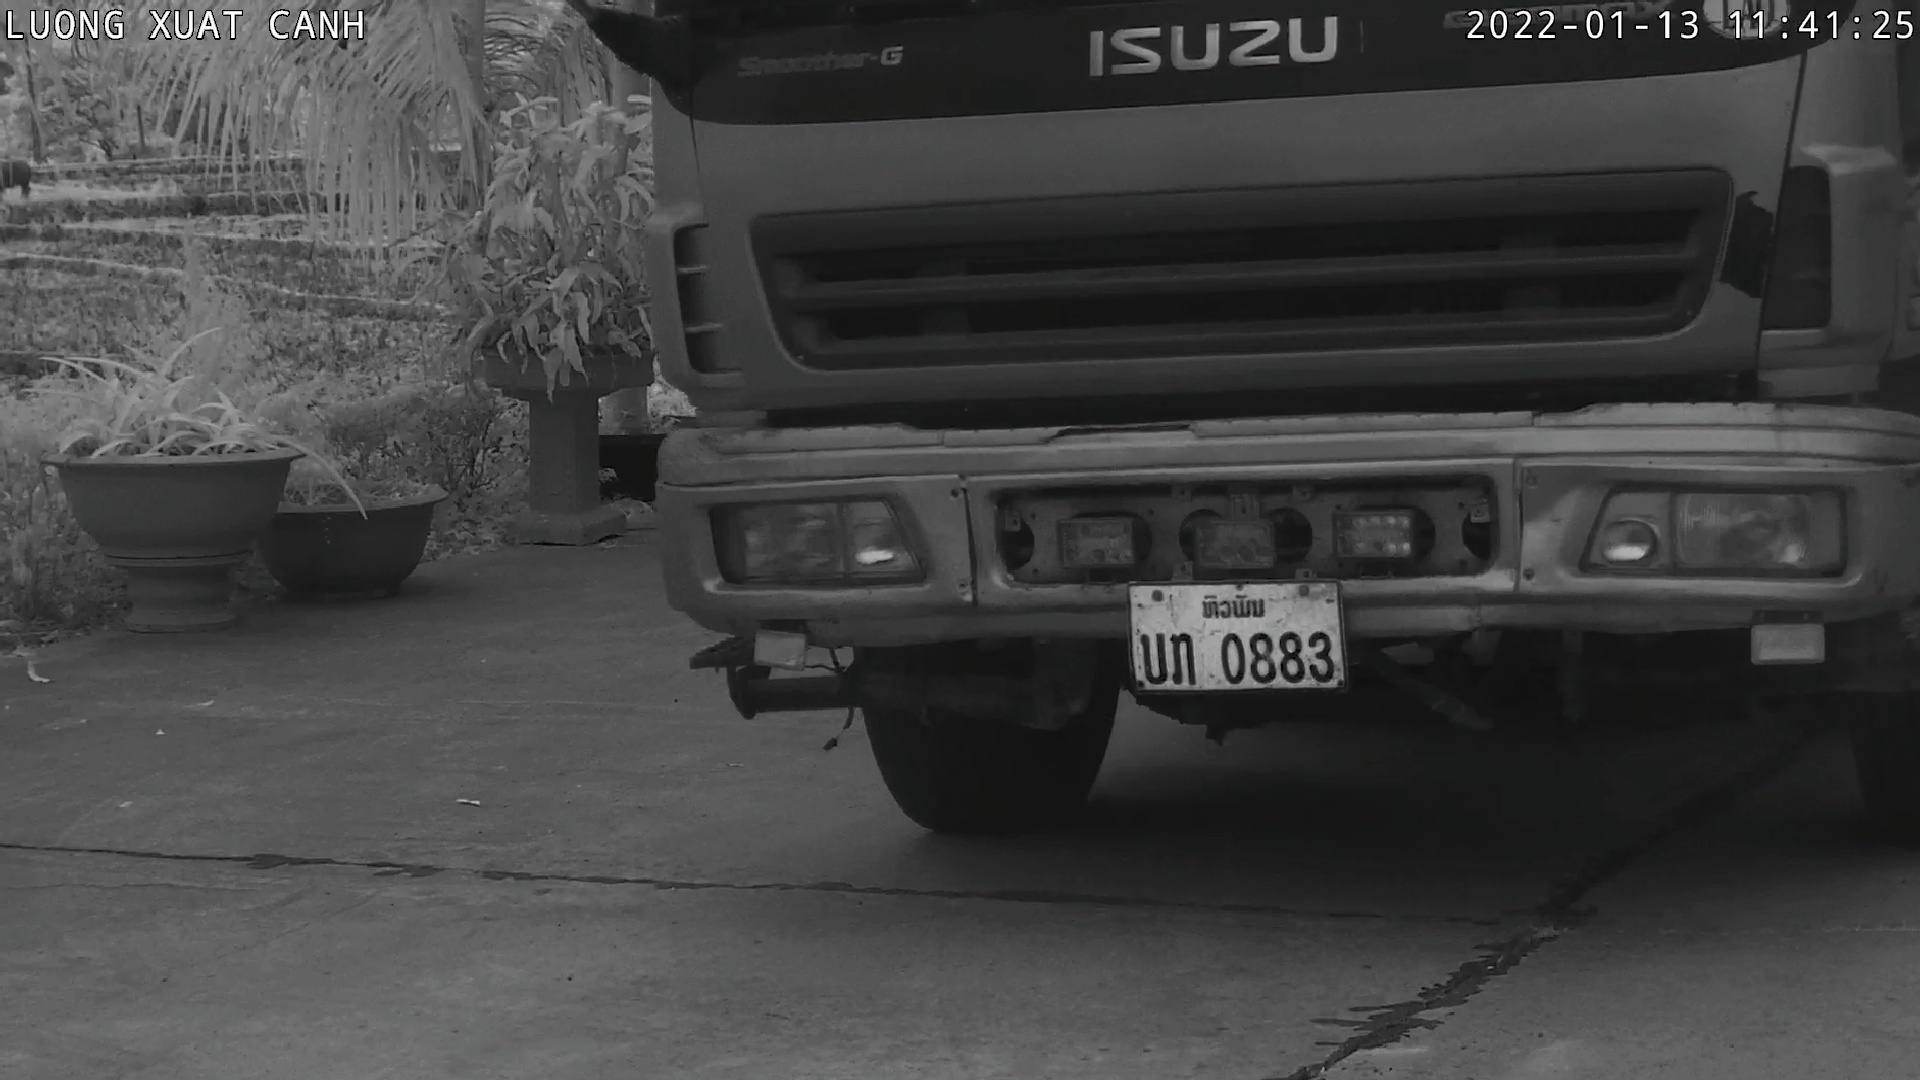

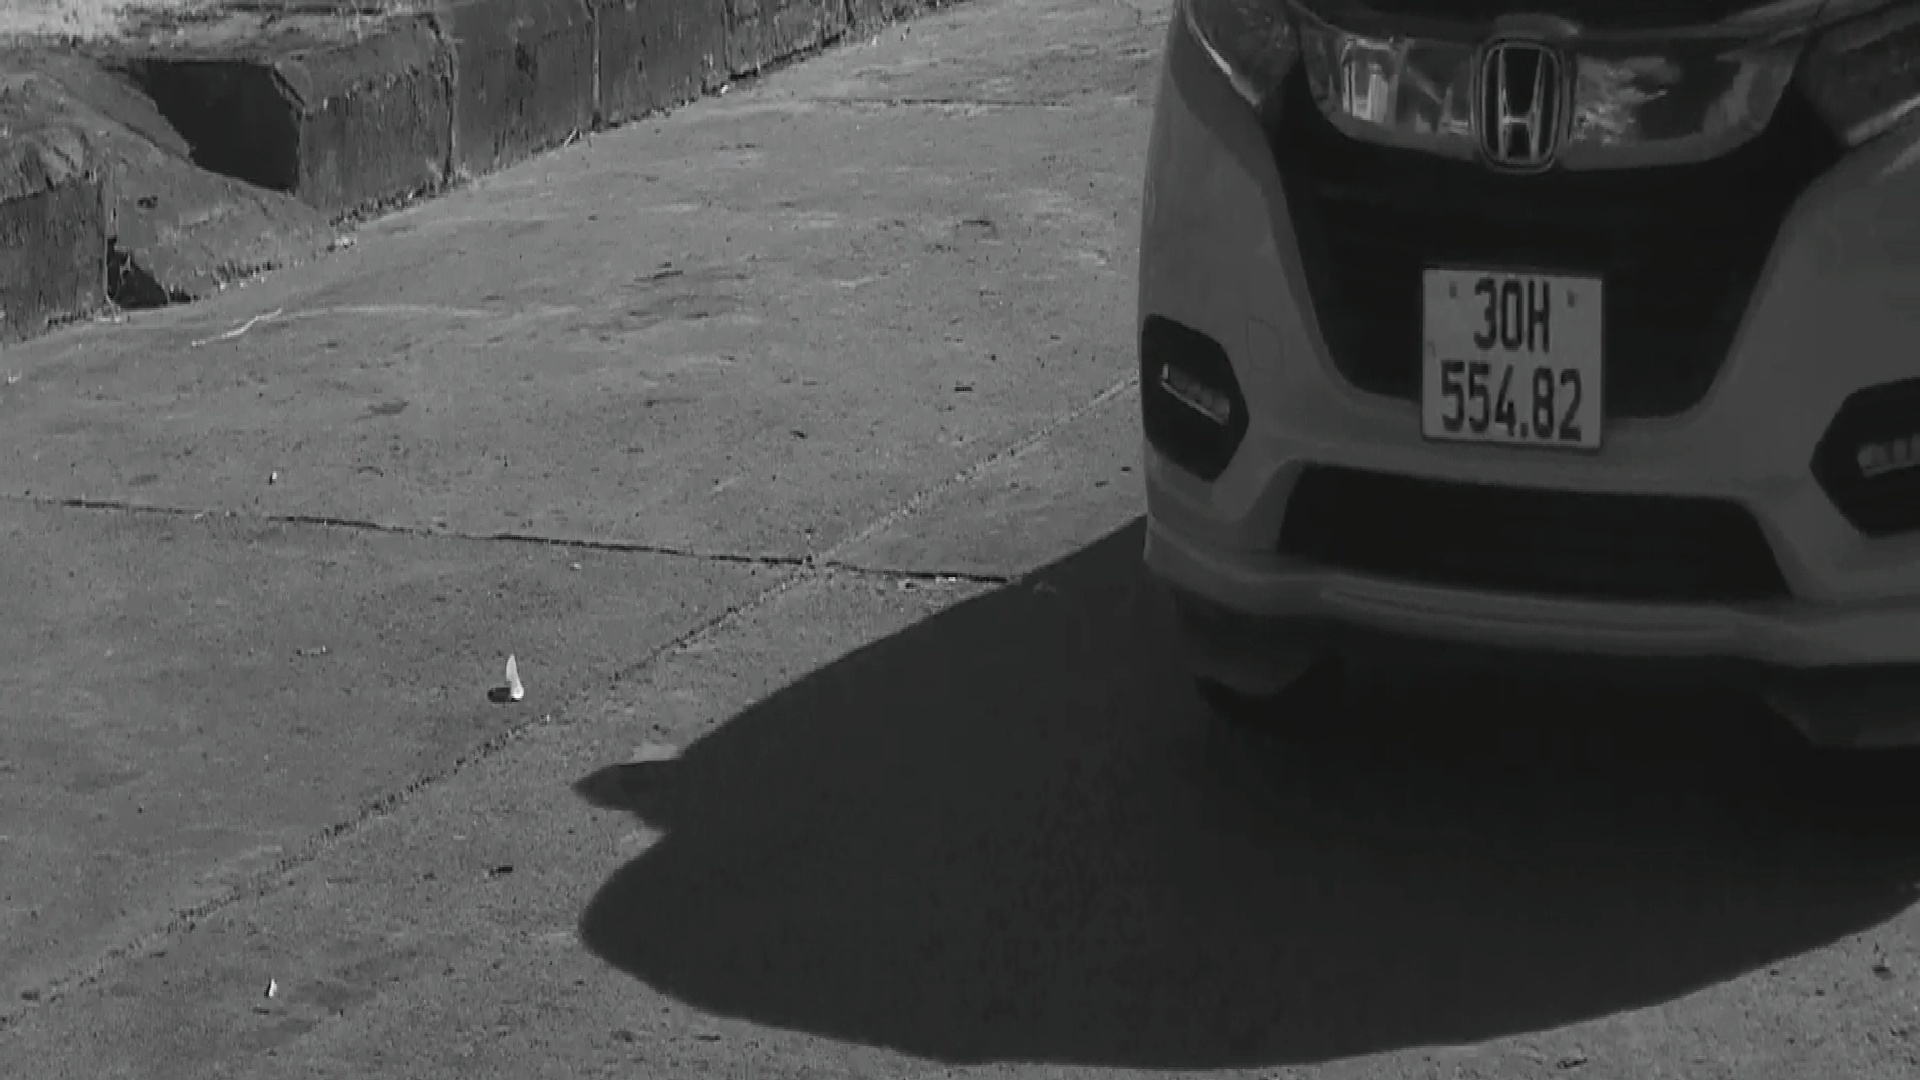

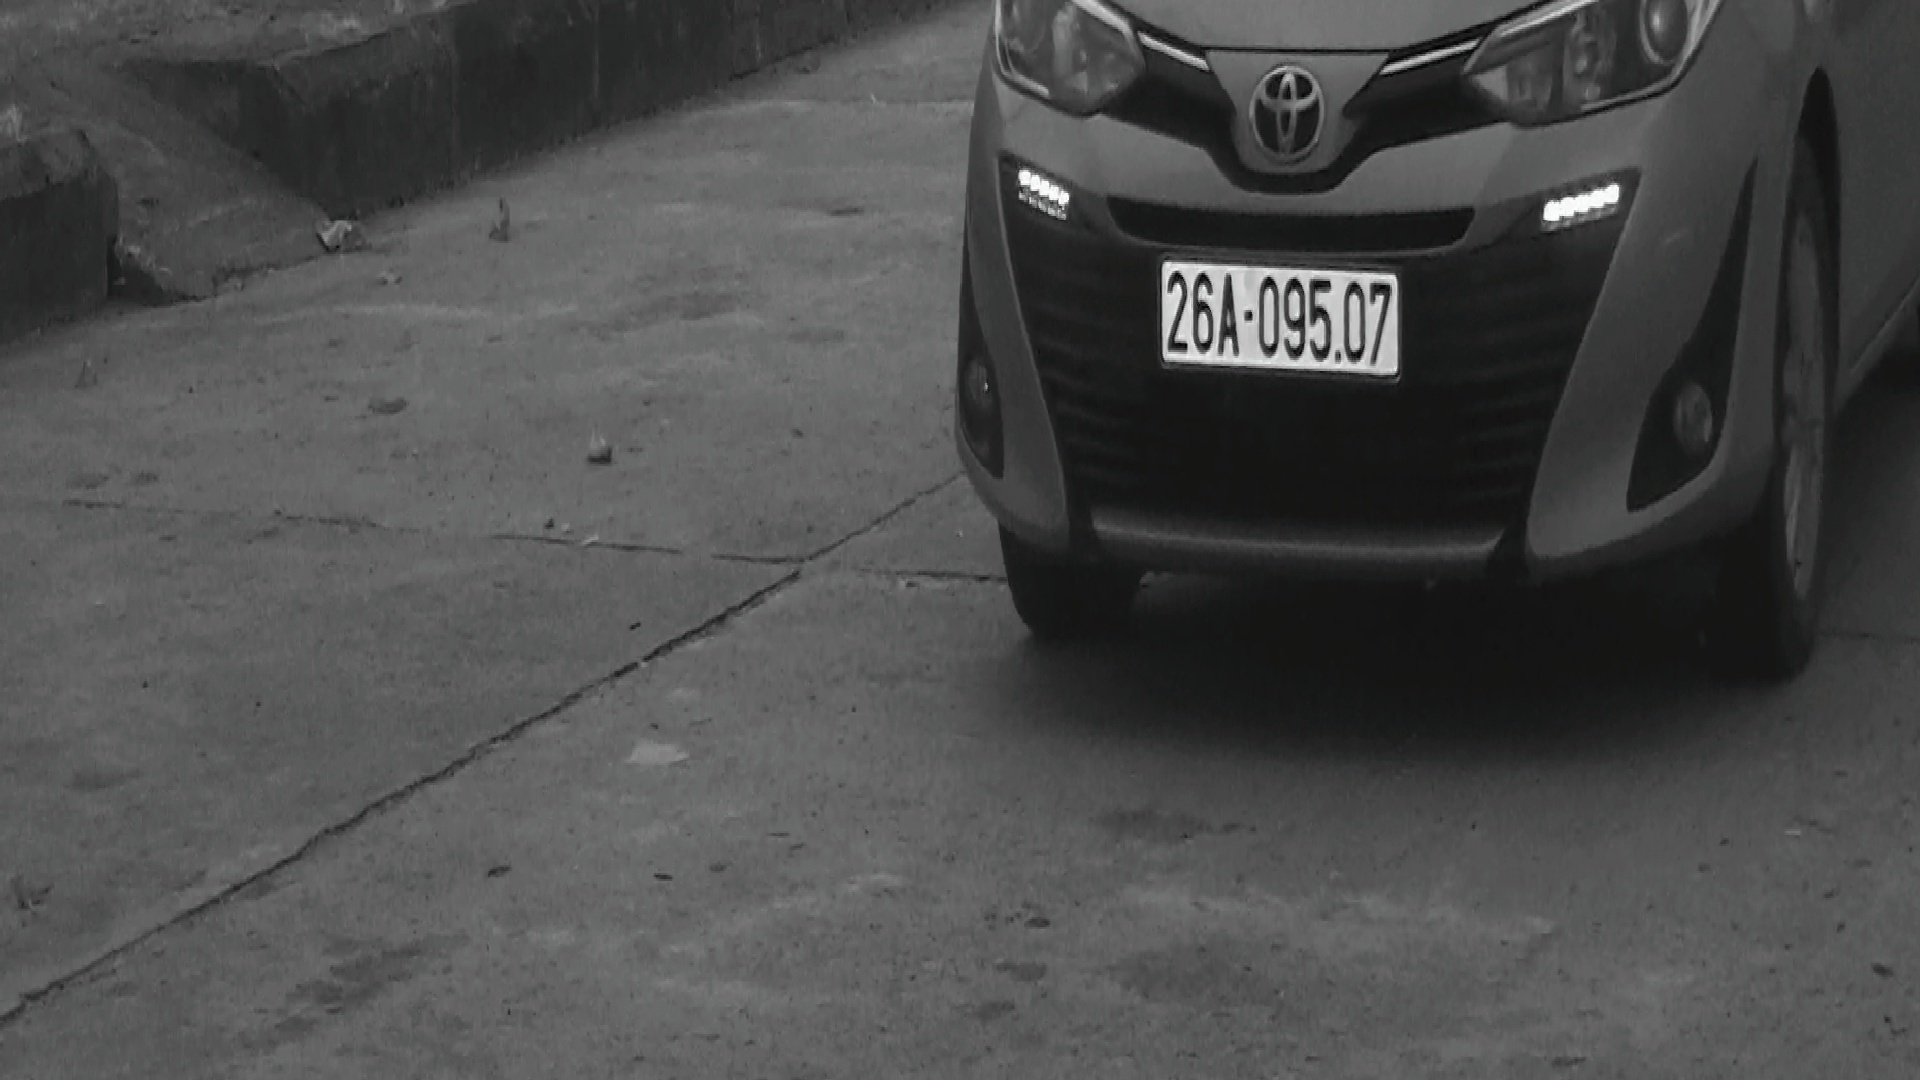

In [27]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp2/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere